In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
dados = pd.read_csv('dados_limpos.csv')
dados.drop(columns='Unnamed: 0', inplace=True)
dados.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,2017-11-08,2017-11-11,Second Class,0,Consumer,Henderson,Kentucky,South,0,Furniture,Bookcases,261.960,2.0,0.0,41.9136
1,1,2017-06-12,2017-06-16,Second Class,1,Corporate,Los Angeles,California,West,2,Office Supplies,Labels,14.620,2.0,0.0,6.8714
2,2,2016-10-11,2016-10-18,Standard Class,2,Consumer,Fort Lauderdale,Florida,South,4,Office Supplies,Storage,22.368,2.0,0.2,2.5164


In [6]:
dados['Ship Date'] = pd.to_datetime(dados['Ship Date'])
dados['Order Date'] = pd.to_datetime(dados['Order Date'])

ANÁLISE ESTATISTICA

In [8]:
dados.describe() 

,Order ID,Customer ID,Product ID,Sales,Quantity,Discount,Profit
count,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000,7779.000000
mean,2476.553799,363.913999,828.097185,78.360695,3.435789,0.124002,14.823867
std,1446.766576,223.726717,507.892147,97.190887,1.887988,0.166164,21.518171
min,0.000000,0.000000,0.000000,0.852000,1.000000,0.000000,-29.940000
25%,1213.000000,170.000000,393.000000,14.760000,2.000000,0.000000,2.814850
50%,2471.000000,352.000000,799.000000,36.400000,3.000000,0.000000,8.205600
75%,3714.000000,554.000000,1238.500000,101.910000,5.000000,0.200000,20.874950
max,5008.000000,792.000000,1861.000000,499.584000,9.000000,0.700000,99.940800


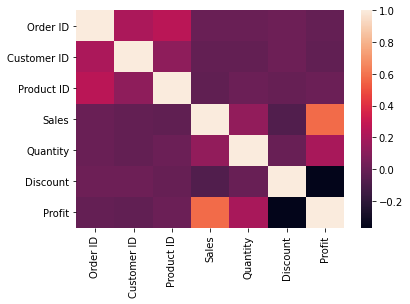

In [15]:
import seaborn as sns
corr = dados.corr()
sns.heatmap(corr);

In [9]:
dados.nunique()

Order ID        4401
Order Date      1204
Ship Date       1298
Ship Mode          4
Customer ID      789
Segment            3
City             515
State             48
Region             4
Product ID      1696
Category           3
Sub-Category      17
Sales           4298
Quantity           9
Discount          10
Profit          5593
dtype: int64

ANÁLISE EXPLORATÓRIA

In [17]:
import sweetviz as sv
eda = sv.analyze(source = dados)
eda.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


FATURAMENTO

In [22]:
dados.Sales.sum().round(2)

609567.84

In [23]:
dados.Profit.sum().round(2)

115314.86

In [28]:
previsao = pd.read_csv('https://raw.githubusercontent.com/joaovictordds/previsao_tractian/main/previsao7dias.csv')
previsao['Unnamed: 0'] = pd.to_datetime(previsao['Unnamed: 0'])
previsao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  7 non-null      datetime64[ns]
 1   Sales       7 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 240.0 bytes


In [41]:
# Vendas dos últimos 7 dias
dados.groupby('Order Date')['Sales'].sum().tail(7).round(2)

Order Date
2018-12-24    1027.14
2018-12-25    1673.72
2018-12-26      63.91
2018-12-27      13.25
2018-12-28     589.13
2018-12-29    1104.43
2018-12-30     713.79
Name: Sales, dtype: float64

In [34]:
# Previsão de vendas dos próximos 7 dias
previsao

,Unnamed: 0,Sales
0,2018-12-31,569.93
1,2019-01-01,772.97
2,2019-01-02,442.01
3,2019-01-03,27.98
4,2019-01-04,399.16
5,2019-01-05,442.48
6,2019-01-06,564.14


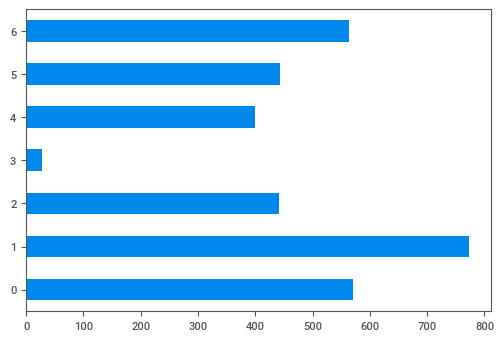

In [43]:
previsao.Sales.plot(kind='barh');